In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

In [44]:
#from google.colab import files
#uploaded = files.upload()

In [45]:
df=pd.read_csv(r"C:\Users\Nandan G\python_practice\blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [46]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [47]:
df.tail()

,Data,Labels
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1999,Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...,talk.religion.misc


In [48]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [50]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [51]:
df.isnull()

,Data,Labels
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1995,False,False
1996,False,False
1997,False,False
1998,False,False


In [52]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [53]:
df.isnull().sum().sum()

0

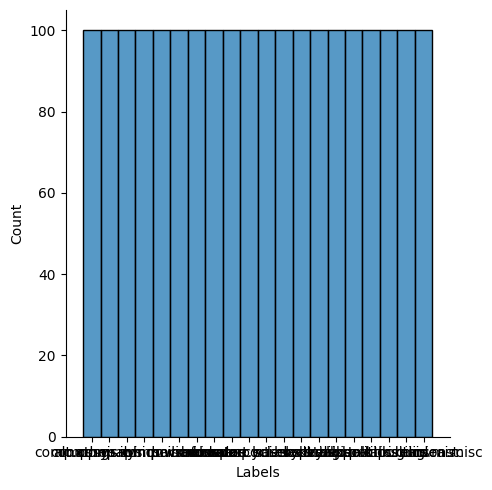

In [54]:
sns.displot(df["Labels"])
plt.show()

In [55]:
df.shape

(2000, 2)

In [56]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

In [57]:
df['Labels'].value_counts().keys()

Index(['alt.atheism', 'comp.graphics', 'talk.politics.misc',
       'talk.politics.mideast', 'talk.politics.guns', 'soc.religion.christian',
       'sci.space', 'sci.med', 'sci.electronics', 'sci.crypt',
       'rec.sport.hockey', 'rec.sport.baseball', 'rec.motorcycles',
       'rec.autos', 'misc.forsale', 'comp.windows.x', 'comp.sys.mac.hardware',
       'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc',
       'talk.religion.misc'],
      dtype='object', name='Labels')

In [58]:
df['Labels'].value_counts().values

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100], dtype=int64)

In [59]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [60]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

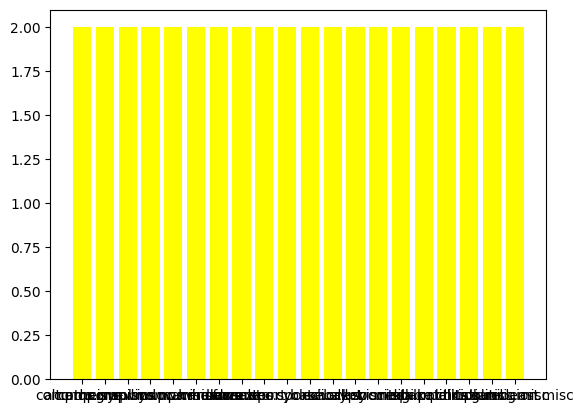

In [61]:
plt.bar(df['Labels'],height=2,color="yellow")
plt.show()

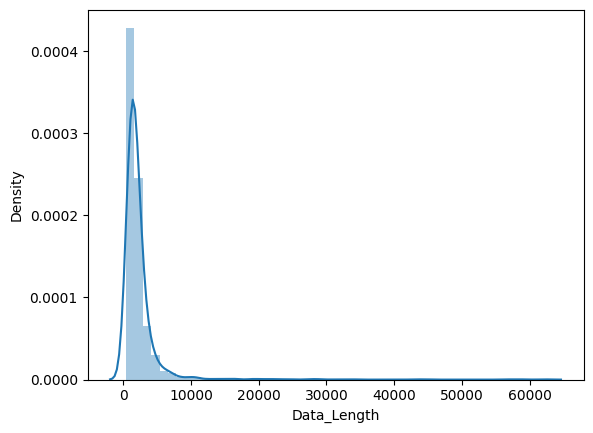

In [62]:
df['Data_Length'] = df['Data'].apply(len)  # Create a new column with the length of each string in 'Data'
sns.distplot(df['Data_Length'])  # Plot the distribution of string lengths
plt.show()

In [63]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [66]:
from sklearn.naive_bayes import MultinomialNB

In [67]:
mnb = MultinomialNB()

In [68]:
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Assuming 'x' is your text data and 'y' are the labels
# and the text data is in a column called 'text_column'

# 1. Create a CountVectorizer object
vectorizer = CountVectorizer()

# 2. Fit the vectorizer to your training data and transform it
# Assuming 'text_column' is the name of the column containing your text data
x_train_vec = vectorizer.fit_transform(x_train['Data']) # fit on the text column

# 3. Transform your testing data using the same vectorizer
x_test_vec = vectorizer.transform(x_test['Data']) # transform the text column

# 4. Now, fit the MultinomialNB model using the transformed data
mnb = MultinomialNB()
mnb.fit(x_train_vec, y_train) # Use the vectorized training data here

# You can now use the trained model to make predictions on the vectorized test data
# predictions = mnb.predict(x_test_vec)

Defaulting to user installation because normal site-packages is not writeable


MultinomialNB()

In [69]:
pip install pandas scikit-learn nltk

Note: you may need to restart the kernel to use updated packages.


In [70]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [71]:
# Replace with your actual dataset path
df = pd.read_csv(r"C:\Users\Nandan G\python_practice\blogs.csv")

# Replace these with your actual column names
x = df['Data']
y = df['Labels']


In [72]:
def preprocess(text):
    text = str(text).lower()                          # Lowercase
    text = re.sub(r'[^\w\s]', '', text)               # Remove punctuation
    tokens = text.split()                             # Tokenize by whitespace
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]  # Remove stopwords
    return ' '.join(tokens)

x = x.apply(preprocess)


In [73]:
vectorizer = TfidfVectorizer()
x_vectorized = vectorizer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.3, random_state=42)


In [74]:
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [75]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))


Accuracy: 0.7683333333333333
Precision: 0.8273900509518582
Recall: 0.7683333333333333
F1 Score: 0.7620507132257942


In [76]:
y_test.head(), y_pred[0:5]

(1860          talk.politics.misc
 353     comp.sys.ibm.pc.hardware
 1333                     sci.med
 905           rec.sport.baseball
 1289             sci.electronics
 Name: Labels, dtype: object,
 array(['alt.atheism', 'comp.sys.ibm.pc.hardware', 'sci.med',
        'rec.sport.baseball', 'sci.electronics'], dtype='<U24'))

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_test,y_pred)

array([[23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0, 24,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  1, 27,  1,  0,  0,  0,  0,  1,  0,  0,  2,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  1,  2, 21,  0,  0,  5,  0,  0,  0,  0,  4,  3,  0,  0,  0,
         0,  0,  0,  0],
       [ 2,  1,  0,  1, 26,  0,  2,  0,  1,  0,  1,  1,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  5,  0,  1,  0, 21,  3,  0,  2,  0,  0,  3,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 21,  1,  1,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 26,  4,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 29,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

In [79]:
(7)/(10+7)

0.4117647058823529

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.7683333333333333
Precision: 0.8273900509518582
Recall: 0.7683333333333333
F1-score: 0.7620507132257942


In [81]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [82]:
x=df[['Data', 'Labels']]

In [83]:
x.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [84]:
y = df.iloc[:, -1]

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
gnb = GaussianNB()

In [89]:
!pip install pandas scikit-learn
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Assuming 'x' is your original data containing a mix of numerical and string/categorical features
# and 'y' is your target variable.

# 1. Handle Categorical Features:
# Identify categorical features (e.g., columns with string data types)
categorical_features = x.select_dtypes(include=['object']).columns

# If you have categorical features, apply OneHotEncoding or LabelEncoding
if categorical_features.size > 0:
    # One-Hot Encoding using pandas.get_dummies
    x = pd.get_dummies(x, columns=categorical_features, drop_first=True)

# 2. Handle Text Features:
# Identify text features (e.g., columns containing text data)
text_features = ['Data']  # Explicitly define text_features here
# Check if the text feature exists in the DataFrame
if text_features[0] in x.columns:
    # Apply TF-IDF Vectorization if the column exists
    vectorizer = TfidfVectorizer()
    text_data = vectorizer.fit_transform(x[text_features[0]])  # Assuming only one text feature for now.
    text_df = pd.DataFrame(text_data.toarray(), columns=vectorizer.get_feature_names_out())
    x = x.drop(columns=text_features) # Drop original text column.
    x = pd.concat([x, text_df], axis=1) # Add new features.
else:
    print(f"Warning: Text feature '{text_features[0]}' not found in the DataFrame.")


# 3. Split and Train:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

gnb = GaussianNB()
gnb.fit(x_train, y_train)

Defaulting to user installation because normal site-packages is not writeable


GaussianNB()

In [90]:
y_pred=gnb.predict(x_test)

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(y_test,y_pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0, 51,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 46,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

In [93]:
(42+32)/(42+32+16+18)

0.6851851851851852

In [94]:
!pip install textblob
from textblob import TextBlob


Defaulting to user installation because normal site-packages is not writeable


In [95]:
# Add sentiment polarity and subjectivity
df['polarity'] = df['Data'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
df['subjectivity'] = df['Data'].apply(lambda text: TextBlob(str(text)).sentiment.subjectivity)

# Classify as Positive, Negative, or Neutral
def get_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['polarity'].apply(get_sentiment)

# View sentiment distribution
print(df['Sentiment'].value_counts())


Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


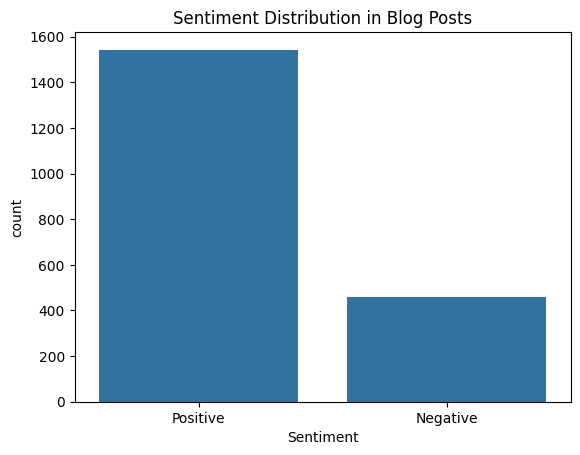

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Distribution
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution in Blog Posts")
plt.show()
